In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [5]:
oecd_data = pd.read_csv('OECD,DF_BLI,+all.csv')
gdp_data = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_85121.csv')

In [33]:
def prepare_data(oecd, gdp):
    latest_gdp = gdp[['Country Name', '2023']]
    satisfaction = oecd[(oecd['Indicator'] == 'Life satisfaction') & (oecd['INEQUALITY'] == 'TOT')][['Country', 'OBS_VALUE']]

    return pd.merge(latest_gdp, satisfaction, left_on='Country Name', right_on='Country', how='inner')

stats = prepare_data(oecd_data, gdp_data)

stats.head()

,Country Name,2023,Country,OBS_VALUE
0,Australia,64820.911789,Australia,7.1
1,Austria,56033.573792,Austria,7.2
2,Belgium,54700.909324,Belgium,6.8
3,Brazil,10294.866681,Brazil,6.1
4,Canada,53431.185706,Canada,7.0


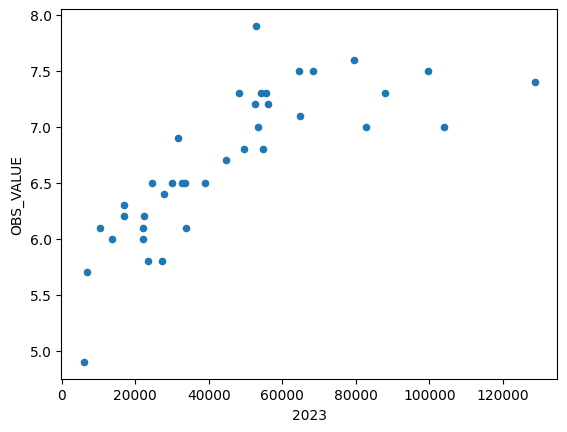

In [28]:
X = np.c_[stats['2023']]
y = np.c_[stats['OBS_VALUE']]

stats.plot(kind='scatter', x='2023', y='OBS_VALUE')
plt.show()

In [30]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [32]:
model.predict([[6900]])

array([[6.00095186]])